## Arbeitsverzeichnis prüfen


In [1]:
import os
print(os.getcwd())  # zeigt, in welchem Ordner du dich gerade befindest


c:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit


## Daten laden


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Alle Spalten anzeigen
features_df = pd.read_pickle("FinaleTabelle_With_Shifts.pkl")

In [3]:
features_df

,ts,interval_end,n_arrivals,n_departures,n_total,grid_time,station,air_temperature_2_m_above_ground_current_value__degc_,air_temperature_at_5_cm_above_grass_current_value__degc_,air_temperature_at_surface_current_value__degc_,chill_temperature_current_value__degc_,relative_air_humidity_2_m_above_ground_current_value__percent_,dew_point_2_m_above_ground_current_value__degc_,vapour_pressure_2_m_above_ground_current_value__hpa_,atmospheric_pressure_at_barometric_altitude__qfe__current_value__hpa_,pressure_reduced_to_sea_level_according_to_standard_atmosphere__qnh__current_value__hpa_,pressure_reduced_to_sea_level__qff__current_value__hpa_,geopotential_height_of_the_850_hpa_level_current_value__gpm_,geopotential_height_of_the_700_hpa_level_current_value__gpm_,gust_peak__one_second__maximum_in_m_per_s__m_per_s_,wind_speed_vectoriel_ten_minutes_mean_in_m_per_s__m_per_s_,wind_speed_scalar_ten_minutes_mean_in_m_per_s__m_per_s_,wind_direction_ten_minutes_mean__deg_,foehn_index__code_,wind_speed_ten_minutes_mean_in_km_per_h__km_per_h_,gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_,gust_peak__one_second__maximum_in_km_per_h__km_per_h_,gust_peak__three_seconds__maximum_in_km_per_h__km_per_h_,precipitation_ten_minutes_total__mm_,snow_depth__automatic_measurement__current_value__cm_,global_radiation_ten_minutes_mean__w_per_m_2_,diffuse_radiation_ten_minutes_mean__w_per_m_2_,longwave_incoming_radiation_ten_minutes_mean__w_per_m_2_,longwave_outgoing_radiation_ten_minute_mean__w_per_m_2_,shortwave_reflected_radiation_ten_minute_mean__w_per_m_2_,sunshine_duration_ten_minutes_total__min_,code,type,correction,mod,station_id,cycle,wind_dir,wind_vrb,wind_speed,wind_gust,wind_dir_from,wind_dir_to,vis,vis_dir,max_vis,max_vis_dir,temp,dewpt,press,runway,weather,recent,sky,windshear,wind_speed_peak,wind_dir_peak,peak_wind_time,wind_shift_time,max_temp_6hr,min_temp_6hr,max_temp_24hr,min_temp_24hr,press_sea_level,precip_1hr,precip_3hr,precip_6hr,precip_24hr,snowdepth,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,airport,AG,AI,AR,BE,BL,BS,FR,GE,GL,GR,JU,LU,NE,NW,OW,SG,SH,SO,SZ,TG,TI,UR,VD,VS,ZG,ZH,COUNT_ANY,ANY,SHARE_ANY,Time_of_Prediction,Hour_sin,Hour_cos,Minute_sin,Minute_cos,Day_of_week_sin,Day_of_week_cos,Month_sin,Month_cos,Year_sin,Year_cos,vis_m,vis_cat,wind_dir_deg,wind_dir_sin,wind_dir_cos,interval_end.1,dominant_runway_concept,dominant_runway_count,Ferien_Gesamtfaktor,n_arrivals2,n_departures2,n_arrivals3,n_departures3
0,2023-01-01 05:50:00+00:00,2023-01-01 06:20:00,5,0,5,2023-01-01 05:50:00,KLO,13.0,9.9,9.1,13.0,66.3,6.9,9.9,973.0,1023.8,1023.5,NaN,NaN,7.3,4.0,4.1,224.0,NaN,14.8,6.9,26.3,24.8,0.0,0.0,2,1.0,302,NaN,NaN,0,LSZH 010550Z 22007KT CAVOK 13/07 Q1023 NOSIG,METAR,NaN,AUTO,LSZH,6.0,220.0,False,7.0,NaN,NaN,NaN,10000 meters,NaN,NaN,NaN,13.0,7.0,1023.0,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LSZH,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,26,True,1.0,2023-01-01 05:50:00+00:00,0.982963,0.629410,0.066987,0.75,0.109084,0.811745,0.75,0.933013,0.996057,0.562667,10000.0,H,220.0,0.178606,0.116978,2023-01-01 06:20:00,EVENING_C1,5,17.520557,1,3,4,9
1,2023-01-01 06:20:00+00:00,2023-01-01 06:50:00,1,3,4,2023-01-01 06:20:00,KLO,12.5,9.7,9.0,12.5,68.4,6.8,9.9,973.2,1024.0,1023.8,NaN,NaN,6.1,4.1,4.1,233.0,NaN,14.8,5.7,22.0,20.5,0.0,0.0,2,1.0,300,NaN,NaN,0,LSZH 010620Z 24007KT CAVOK 13/07 Q1024 NOSIG,METAR,NaN,AUTO,LSZH,6.0,240.0,False,7.0,NaN,NaN,NaN,10000 meters,NaN,NaN,NaN,13.0,7.0,1024.0,[],[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LSZH,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,26,True,1.0,2023-01-01 06:20:00+00:00,1.000000,0.500000,0.933013,0.25,0.109084,0.811745,0.75,0.933013,0.996057,0.562667,10000.0,H,240.0,0.066987,0.250000,2023-01-01 06:50:00,EVENING_C1,4,17.520557,4,9,1,18
2,20

In [4]:
print(list(features_df.columns))

['ts', 'interval_end', 'n_arrivals', 'n_departures', 'n_total', 'grid_time', 'station', 'air_temperature_2_m_above_ground_current_value__degc_', 'air_temperature_at_5_cm_above_grass_current_value__degc_', 'air_temperature_at_surface_current_value__degc_', 'chill_temperature_current_value__degc_', 'relative_air_humidity_2_m_above_ground_current_value__percent_', 'dew_point_2_m_above_ground_current_value__degc_', 'vapour_pressure_2_m_above_ground_current_value__hpa_', 'atmospheric_pressure_at_barometric_altitude__qfe__current_value__hpa_', 'pressure_reduced_to_sea_level_according_to_standard_atmosphere__qnh__current_value__hpa_', 'pressure_reduced_to_sea_level__qff__current_value__hpa_', 'geopotential_height_of_the_850_hpa_level_current_value__gpm_', 'geopotential_height_of_the_700_hpa_level_current_value__gpm_', 'gust_peak__one_second__maximum_in_m_per_s__m_per_s_', 'wind_speed_vectoriel_ten_minutes_mean_in_m_per_s__m_per_s_', 'wind_speed_scalar_ten_minutes_mean_in_m_per_s__m_per_s_', '

## Feature- und Target-Definition


In [5]:
X = features_df[[
    'dominant_runway_concept',
    'Ferien_Gesamtfaktor',
    #'wind_dir_sin',
    #'wind_dir_cos',
    #'vis_m',
    #'vis_cat',
    'Hour_sin',
    'Hour_cos',
    'Minute_sin',
    #'Minute_cos',
    'Day_of_week_sin',
    #'Day_of_week_cos',
    'Month_sin',
    'Month_cos',
    #'COUNT_ANY',
    'temp',
    #'dewpt',
    #'press',
    'precipitation_ten_minutes_total__mm_',
    #'gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_',
    #'gust_peak__one_second__maximum_in_m_per_s__m_per_s_'
]]


In [6]:
y = features_df[['n_departures']]

## Datensplit (Train, Validation, Test)


In [7]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [8]:
# 1. Erster Split → 60% Train, 40% "Temp" (Test+Val)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# 2. Zweiter Split → 50% von 40% = 20% Test, 20% Validation
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [9]:
X_train

,dominant_runway_concept,Ferien_Gesamtfaktor,Hour_sin,Hour_cos,Minute_sin,Day_of_week_sin,Month_sin,Month_cos,temp,precipitation_ten_minutes_total__mm_
13982,SOUTH_C1,0.000000,0.250000,0.933013,0.933013,0.012536,0.750000,0.933013,-3.0,0.0
8973,STANDARD,0.000000,0.146447,0.146447,0.933013,0.716942,0.066987,0.250000,18.0,0.0
13838,SOUTH,0.000000,0.982963,0.629410,0.066987,0.987464,0.750000,0.933013,-5.0,0.0
1639,STANDARD,4.001727,0.629410,0.017037,0.933013,0.890916,0.933013,0.750000,1.0,0.0
11374,STANDARD,0.357892,0.370590,0.017037,0.933013,0.012536,0.250000,0.933013,7.0,0.1
...,...,...,...,...,...,...,...,...,...,...
16850,STANDARD,8.494758,0.370590,0.017037,0.933013,0.109084,1.000000,0.500000,18.0,0.0
6265,STANDARD,0.357892,0.629410,0.017037,0.066987,0.500000,0.500000,0.000000,28.0,0.0
11284,NaN,0.357892,0.370590,0.982963,0.066987,0.987464,0.250000,0.933013,6.0,0.0
860,STANDARD,0.000000,0.750000,0.066987,0.933013,0.890916,0.750000,0.933013,2.0,0.0


## Modellinitialisierung


In [10]:
from lightgbm import LGBMRegressor


In [11]:
model = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=100000,
    learning_rate=0.05,
    num_leaves=31,
    early_stopping_round=50  # LightGBM nutzt diesen Parameter im fit()-Aufruf, siehe unten
)


## Modelltraining mit Early Stopping


In [12]:
model.fit(X_train, y_train, eval_set=[(X_val, y_val)])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 21887, number of used features: 10
[LightGBM] [Info] Start training from score 9.565907
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[447]	valid_0's l2: 5.95889


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


## Modellbewertung (MAE, RMSE, R²)


In [13]:
# Metriken importieren
from sklearn.metrics import mean_absolute_error, r2_score
try:
    # neuere sklearn
    from sklearn.metrics import root_mean_squared_error as rmse_fn
except ImportError:
    # Fallback
    from sklearn.metrics import mean_squared_error
    rmse_fn = lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)


# ------------------------------
# TRAIN-PERFORMANCE
# ------------------------------
y_train_pred = model.predict(X_train, num_iteration=model.best_iteration_)

mae_train  = mean_absolute_error(y_train, y_train_pred)
rmse_train = rmse_fn(y_train, y_train_pred)
r2_train   = r2_score(y_train, y_train_pred)

#print(f"Train       -> MAE: {mae_train:.3f} | RMSE: {rmse_train:.3f} | R²: {r2_train:.3f}")


# ------------------------------
# VALIDATION-PERFORMANCE  (NEU)
# ------------------------------
y_val_pred = model.predict(X_val, num_iteration=model.best_iteration_)

mae_val  = mean_absolute_error(y_val, y_val_pred)
rmse_val = rmse_fn(y_val, y_val_pred)
r2_val   = r2_score(y_val, y_val_pred)

print(f"Validation  -> MAE: {mae_val:.3f} | RMSE: {rmse_val:.3f} | R²: {r2_val:.3f}")


Validation  -> MAE: 1.877 | RMSE: 2.441 | R²: 0.776


In [14]:
X_test

,dominant_runway_concept,Ferien_Gesamtfaktor,Hour_sin,Hour_cos,Minute_sin,Day_of_week_sin,Month_sin,Month_cos,temp,precipitation_ten_minutes_total__mm_
30943,NORTHWEST,10.783658,0.629410,0.017037,0.933013,0.987464,0.933013,0.250000,14.0,0.0
18459,NORTHWEST,0.000000,0.250000,0.933013,0.933013,0.500000,0.750000,0.066987,12.0,0.0
12296,STANDARD,0.000000,0.629410,0.017037,0.066987,0.987464,0.250000,0.933013,3.0,0.0
23606,SOUTH,8.449152,0.982963,0.629410,0.066987,0.500000,0.000000,0.500000,10.0,0.1
4202,NORTHWEST,4.115016,0.066987,0.250000,0.933013,0.500000,0.933013,0.250000,9.0,0.6
...,...,...,...,...,...,...,...,...,...,...
25839,STANDARD,0.000000,0.500000,0.000000,0.933013,0.283058,0.250000,0.933013,4.0,0.0
25113,STANDARD,0.000000,0.017037,0.629410,0.933013,0.012536,0.250000,0.933013,7.0,0.0
8528,STANDARD,7.936754,0.250000,0.066987,0.066987,0.012536,0.066987,0.250000,33.0,0.0
12035,STANDARD,0.000000,0.750000,0.066987,0.066987,0.987464,0.250000,0.933013,4.0,0.0


In [15]:
features_df.iloc[30400]


ts                     2025-04-01 17:20:00+00:00
interval_end                 2025-04-01 17:50:00
n_arrivals                                    12
n_departures                                  11
n_total                                       23
                                 ...            
Ferien_Gesamtfaktor                     0.407727
n_arrivals2                                    9
n_departures2                                 10
n_arrivals3                                   11
n_departures3                                 13
Name: 30400, Length: 131, dtype: object

In [16]:
y_test

,n_departures
30943,11
18459,3
12296,9
23606,3
4202,7
...,...
25839,17
25113,0
8528,5
12035,7


In [17]:
print(features_df["ts"].dtype)


datetime64[ns, UTC]


In [18]:
print("Train shape:", X_train.shape)
print("Val shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (21887, 10)
Val shape: (7296, 10)
Test shape: (7296, 10)


In [19]:
assert not set(X_test.index).intersection(X_train.index)
assert not set(X_test.index).intersection(X_val.index)


## 2. Modell

In [20]:
X_dep2 = features_df[[
    'dominant_runway_concept',
    'Ferien_Gesamtfaktor',
    #'wind_dir_sin',
    #'wind_dir_cos',
    #'vis_m',
    #'vis_cat',
    'Hour_sin',
    'Hour_cos',
    'Minute_sin',
    #'Minute_cos',
    'Day_of_week_sin',
    #'Day_of_week_cos',
    'Month_sin',
    'Month_cos',
    #'COUNT_ANY',
    'temp',
    #'dewpt',
    #'press',
    'precipitation_ten_minutes_total__mm_',
    #'gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_',
    #'gust_peak__one_second__maximum_in_m_per_s__m_per_s_'
]]


In [21]:
y_dep2 = features_df[['n_departures2']]


In [22]:
# X_dep2 an bestehenden Split anpassen
X_dep2_train = X_dep2.loc[X_train.index]
X_dep2_val   = X_dep2.loc[X_val.index]
X_dep2_test  = X_dep2.loc[X_test.index]

# y_dep2 an denselben Indizes ausrichten
y_dep2_train = y_dep2.loc[X_train.index]
y_dep2_val   = y_dep2.loc[X_val.index]
y_dep2_test  = y_dep2.loc[X_test.index]


In [23]:
model_dep2 = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=100000,
    learning_rate=0.05,
    num_leaves=31,
    early_stopping_round=50
)


In [24]:
model_dep2.fit(
    X_dep2_train, y_dep2_train,
    eval_set=[(X_dep2_val, y_dep2_val)]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005728 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 21887, number of used features: 10
[LightGBM] [Info] Start training from score 9.493672
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[421]	valid_0's l2: 6.1984


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [25]:
# --- PREDICTION AUF TRAIN-SET ---
y_dep2_train_pred = model_dep2.predict(
    X_dep2_train, num_iteration=model_dep2.best_iteration_
)

# --- METRICS TRAIN ---
mae_dep2_train  = mean_absolute_error(y_dep2_train, y_dep2_train_pred)
rmse_dep2_train = rmse_fn(y_dep2_train, y_dep2_train_pred)
r2_dep2_train   = r2_score(y_dep2_train, y_dep2_train_pred)

#print(f"Train Modell Departure 2      -> MAE: {mae_dep2_train:.3f} | RMSE: {rmse_dep2_train:.3f} | R²: {r2_dep2_train:.3f}")


# --- PREDICTION AUF VALIDATION-SET ---
y_dep2_val_pred = model_dep2.predict(
    X_dep2_val, num_iteration=model_dep2.best_iteration_
)

# --- METRICS VALIDATION ---
mae_dep2_val  = mean_absolute_error(y_dep2_val, y_dep2_val_pred)
rmse_dep2_val = rmse_fn(y_dep2_val, y_dep2_val_pred)
r2_dep2_val   = r2_score(y_dep2_val, y_dep2_val_pred)

print(f"Validation Modell Departure 2 -> MAE: {mae_dep2_val:.3f} | RMSE: {rmse_dep2_val:.3f} | R²: {r2_dep2_val:.3f}")


Validation Modell Departure 2 -> MAE: 1.902 | RMSE: 2.490 | R²: 0.778


## 3. Modell

In [26]:
X_dep3 = features_df[[
    'dominant_runway_concept',
    'Ferien_Gesamtfaktor',
    #'wind_dir_sin',
    #'wind_dir_cos',
    #'vis_m',
    #'vis_cat',
    'Hour_sin',
    'Hour_cos',
    'Minute_sin',
    #'Minute_cos',
    'Day_of_week_sin',
    #'Day_of_week_cos',
    'Month_sin',
    'Month_cos',
    #'COUNT_ANY',
    'temp',
    #'dewpt',
    #'press',
    'precipitation_ten_minutes_total__mm_',
    #'gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_',
    #'gust_peak__one_second__maximum_in_m_per_s__m_per_s_'
]]


In [27]:
y_dep3 = features_df[['n_departures3']]


In [28]:
# X_dep3 an bestehenden Split anpassen
X_dep3_train = X_dep3.loc[X_train.index]
X_dep3_val   = X_dep3.loc[X_val.index]
X_dep3_test  = X_dep3.loc[X_test.index]

# y_dep3 an denselben Indizes ausrichten
y_dep3_train = y_dep3.loc[X_train.index]
y_dep3_val   = y_dep3.loc[X_val.index]
y_dep3_test  = y_dep3.loc[X_test.index]


In [29]:
model_dep3 = LGBMRegressor(
    objective='regression',
    random_state=42,
    n_estimators=100000,
    learning_rate=0.05,
    num_leaves=31,
    early_stopping_round=50
)


In [30]:
model_dep3.fit(
    X_dep3_train, y_dep3_train,
    eval_set=[(X_dep3_val, y_dep3_val)]
)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 296
[LightGBM] [Info] Number of data points in the train set: 21887, number of used features: 10
[LightGBM] [Info] Start training from score 9.361996
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[807]	valid_0's l2: 6.20746


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100000
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [31]:
# --- PREDICTION AUF TRAIN-SET ---
y_dep3_train_pred = model_dep3.predict(
    X_dep3_train, num_iteration=model_dep3.best_iteration_
)

# --- METRICS TRAIN ---
mae_dep3_train  = mean_absolute_error(y_dep3_train, y_dep3_train_pred)
rmse_dep3_train = rmse_fn(y_dep3_train, y_dep3_train_pred)
r2_dep3_train   = r2_score(y_dep3_train, y_dep3_train_pred)

#print(f"Train Modell Departure 3      -> MAE: {mae_dep3_train:.3f} | RMSE: {rmse_dep3_train:.3f} | R²: {r2_dep3_train:.3f}")


# --- PREDICTION AUF VALIDATION-SET ---
y_dep3_val_pred = model_dep3.predict(
    X_dep3_val, num_iteration=model_dep3.best_iteration_
)

# --- METRICS VALIDATION ---
mae_dep3_val  = mean_absolute_error(y_dep3_val, y_dep3_val_pred)
rmse_dep3_val = rmse_fn(y_dep3_val, y_dep3_val_pred)
r2_dep3_val   = r2_score(y_dep3_val, y_dep3_val_pred)

print(f"Validation Modell Departure 3 -> MAE: {mae_dep3_val:.3f} | RMSE: {rmse_dep3_val:.3f} | R²: {r2_dep3_val:.3f}")


Validation Modell Departure 3 -> MAE: 1.880 | RMSE: 2.491 | R²: 0.793


## Prediction

In [32]:
import pandas as pd

timestamp = "2023-11-21 07:20:00+00:00"
ts = pd.to_datetime(timestamp, utc=True)

# ts-Spalte sicher als datetime[UTC]
features_df["ts"] = pd.to_datetime(features_df["ts"], utc=True)

# --- Modell 1 (Departures) ---
sample1 = features_df.loc[features_df["ts"] == ts, X.columns]

# --- Modell 2 (Departures2) ---
sample2 = features_df.loc[features_df["ts"] == ts, X_dep2.columns]

# --- Modell 3 (Departures3) ---
sample3 = features_df.loc[features_df["ts"] == ts, X_dep3.columns]

if sample1.empty or sample2.empty or sample3.empty:
    print("⚠️ Kein Eintrag mit diesem Timestamp in features_df gefunden.")
else:
    pred1 = model.predict(sample1, num_iteration=model.best_iteration_)[0]
    pred2 = model_dep2.predict(sample2, num_iteration=model_dep2.best_iteration_)[0]
    pred3 = model_dep3.predict(sample3, num_iteration=model_dep3.best_iteration_)[0]

    print(f"Zeitpunkt: {ts}")
    print(f"Modell 1 (Departures)   -> Prediction: {pred1:.2f}")
    print(f"Modell 2 (Departures2)  -> Prediction: {pred2:.2f}")
    print(f"Modell 3 (Departures3)  -> Prediction: {pred3:.2f}")


Zeitpunkt: 2023-11-21 07:20:00+00:00
Modell 1 (Departures)   -> Prediction: 16.02
Modell 2 (Departures2)  -> Prediction: 10.06
Modell 3 (Departures3)  -> Prediction: 4.64


In [33]:
COLOR_ACTUAL = "#005BAB"     # ZHAW dark blue
COLOR_PRED1  = "#FF3B30"     # strong red
COLOR_PRED2  = "#FF6F61"     # medium red
COLOR_PRED3  = "#FFB3AB"     # light red


In [34]:
from pathlib import Path

PLOTS_DIR = Path(r"C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots")
PLOTS_DIR.mkdir(parents=True, exist_ok=True)


Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\departures_three_model_forecast.pdf


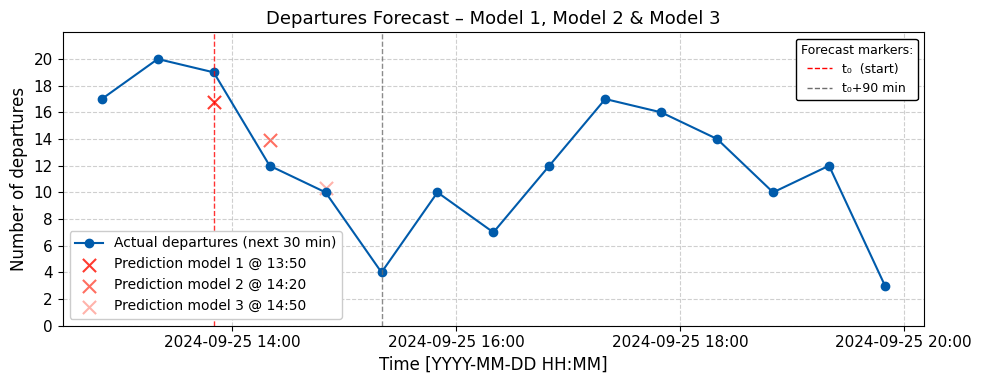

In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# --- Color definitions (ZHAW style) ---
COLOR_ACTUAL = "#005BAB"     # ZHAW dark blue
COLOR_PRED1  = "#FF3B30"     # strong red
COLOR_PRED2  = "#FF6F61"     # medium red
COLOR_PRED3  = "#FFB3AB"     # light red

plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
})

def plot_three_departure_predictions(timestamp_str,
                                     model_dep1, model_dep2, model_dep3,
                                     features_df, X_dep1, X_dep2, X_dep3,
                                     history_points_before=2,
                                     history_points_after=10):
    """
    Plot actual departures and three model predictions
    at three consecutive timestamps starting from timestamp_str.
    """

    # Parse timestamp
    ts0 = pd.to_datetime(timestamp_str, utc=True)

    # Ensure datetime format
    features_df["ts"] = pd.to_datetime(features_df["ts"], utc=True)
    df_sorted = features_df.sort_values("ts")

    # Look up the reference row
    row0 = df_sorted[df_sorted["ts"] == ts0]
    if row0.empty:
        print("⚠️ No entry found for this timestamp.")
        return

    # Get next timestamps for model 2 and 3
    future_rows = df_sorted[df_sorted["ts"] >= ts0].head(3)
    if len(future_rows) < 3:
        print("⚠️ Not enough future timestamps available for all 3 models.")
        return

    ts1 = future_rows.iloc[1]["ts"]   # timestamp for model 2
    ts2 = future_rows.iloc[2]["ts"]   # timestamp for model 3

    # History before ts0
    history_before = df_sorted[df_sorted["ts"] < ts0].tail(history_points_before)

    # History after ts2
    history_after = df_sorted[df_sorted["ts"] > ts2].head(history_points_after)

    # Build the window to plot
    window_df = pd.concat([
        history_before,
        df_sorted[df_sorted["ts"].isin([ts0, ts1, ts2])],
        history_after
    ]).drop_duplicates(subset="ts").sort_values("ts")

    # --- Predictions ---

    # Model 1 → prediction for ts0
    sample1 = features_df.loc[features_df["ts"] == ts0, X_dep1.columns]
    pred1 = model_dep1.predict(sample1, num_iteration=model_dep1.best_iteration_)[0]

    # Model 2 → prediction for ts1 (using features at ts0)
    sample2 = features_df.loc[features_df["ts"] == ts0, X_dep2.columns]
    pred2 = model_dep2.predict(sample2, num_iteration=model_dep2.best_iteration_)[0]

    # Model 3 → prediction for ts2 (using features at ts0)
    sample3 = features_df.loc[features_df["ts"] == ts0, X_dep3.columns]
    pred3 = model_dep3.predict(sample3, num_iteration=model_dep3.best_iteration_)[0]

    # =====================
    #       Plotting
    # =====================

    plt.figure(figsize=(10, 4))
    ax = plt.gca()

    # Actual departures (ZHAW blue)
    ax.plot(window_df["ts"], window_df["n_departures"],
            marker="o", linestyle="-", color=COLOR_ACTUAL,
            label="Actual departures (next 30 min)")

    # Model predictions (red gradient)
    ax.scatter([ts0], [pred1], marker="x", s=90, color=COLOR_PRED1,
               label=f"Prediction model 1 @ {ts0.strftime('%H:%M')}")
    ax.scatter([ts1], [pred2], marker="x", s=90, color=COLOR_PRED2,
               label=f"Prediction model 2 @ {ts1.strftime('%H:%M')}")
    ax.scatter([ts2], [pred3], marker="x", s=90, color=COLOR_PRED3,
               label=f"Prediction model 3 @ {ts2.strftime('%H:%M')}")

    # =====================
    #  Vertical forecast markers
    # =====================

    ts_end_90 = ts0 + pd.Timedelta(minutes=90)

    ax.axvline(ts0, color="red", linestyle="--", linewidth=1, alpha=0.8)
    ax.axvline(ts_end_90, color="#6E6E6E", linestyle="--", linewidth=1, alpha=0.8)

    # =====================
    #  Legends
    # =====================

    main_legend = ax.legend(loc="lower left", framealpha=1.0)

    marker_handles = [
        Line2D([0], [0], color="red", linestyle="--", linewidth=1, label="t₀  (start)"),
        Line2D([0], [0], color="#6E6E6E", linestyle="--", linewidth=1, label="t₀+90 min"),
    ]
    marker_legend = ax.legend(
        handles=marker_handles,
        title="Forecast markers:",
        loc="upper right",
        framealpha=1,
        fancybox=True,
        edgecolor="black",
        fontsize=9,
        title_fontsize=9,
    )
    ax.add_artist(main_legend)





    ax.set_title("Departures Forecast – Model 1, Model 2 & Model 3")
    ax.set_xlabel("Time [YYYY-MM-DD HH:MM]")
    ax.set_ylabel("Number of departures")

    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d %H:%M"))
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
    plt.setp(ax.get_xticklabels(), rotation=0, ha="center")

    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_ylim(0, 22)
    ax.set_yticks(range(0, 21, 2))
    ax.grid(True, linestyle="--", alpha=0.6)

    ax.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    pdf_path = PLOTS_DIR / "departures_three_model_forecast.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()


# Aufruf mit deiner speziellen Zeit bleibt unverändert
plot_three_departure_predictions(
    "2024-09-25 13:50:00+00:00",
    model,
    model_dep2,
    model_dep3,
    features_df,
    X,
    X_dep2,
    X_dep3
)


In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

def print_metrics(model, X_train, X_val, X_test,
                  y_train, y_val, y_test, name):

    # Predictions
    pred_train = model.predict(X_train, num_iteration=model.best_iteration_)
    pred_val   = model.predict(X_val,   num_iteration=model.best_iteration_)
    pred_test  = model.predict(X_test,  num_iteration=model.best_iteration_)

    # Metrics
    mae_train = mean_absolute_error(y_train, pred_train)
    mae_val   = mean_absolute_error(y_val, pred_val)
    mae_test  = mean_absolute_error(y_test, pred_test)

    rmse_train = rmse_fn(y_train, pred_train)
    rmse_val   = rmse_fn(y_val, pred_val)
    rmse_test  = rmse_fn(y_test, pred_test)

    r2_train = r2_score(y_train, pred_train)
    r2_val   = r2_score(y_val, pred_val)
    r2_test  = r2_score(y_test, pred_test)

    # Ausgabe
    print(f"\n{name}")
    print("-------------------------------------------")
    print(f"Train: MAE={mae_train:.3f}, RMSE={rmse_train:.3f}, R²={r2_train:.3f}")
    print(f"Val:   MAE={mae_val:.3f}, RMSE={rmse_val:.3f}, R²={r2_val:.3f}")
    print(f"Test:  MAE={mae_test:.3f}, RMSE={rmse_test:.3f}, R²={r2_test:.3f}")
    print("-------------------------------------------")


# --- DEPARTURE MODELS ---

# Modell 1 – (Departures, nutzt X_dep_*)
print_metrics(
    model,
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    "📌 Departures Modell 1"
)

# Modell 2 – (Departures2, nutzt X_dep2_*)
print_metrics(
    model_dep2,
    X_dep2_train, X_dep2_val, X_dep2_test,
    y_dep2_train, y_dep2_val, y_dep2_test,
    "📌 Departures Modell 2"
)

# Modell 3 – (Departures3, nutzt X_dep3_*)
print_metrics(
    model_dep3,
    X_dep3_train, X_dep3_val, X_dep3_test,
    y_dep3_train, y_dep3_val, y_dep3_test,
    "📌 Departures Modell 3"
)



📌 Departures Modell 1
-------------------------------------------
Train: MAE=1.730, RMSE=2.259, R²=0.814
Val:   MAE=1.877, RMSE=2.441, R²=0.776
Test:  MAE=1.871, RMSE=2.458, R²=0.777
-------------------------------------------

📌 Departures Modell 2
-------------------------------------------
Train: MAE=1.720, RMSE=2.258, R²=0.821
Val:   MAE=1.902, RMSE=2.490, R²=0.778
Test:  MAE=1.866, RMSE=2.447, R²=0.788
-------------------------------------------

📌 Departures Modell 3
-------------------------------------------
Train: MAE=1.585, RMSE=2.099, R²=0.854
Val:   MAE=1.880, RMSE=2.491, R²=0.793
Test:  MAE=1.843, RMSE=2.447, R²=0.801
-------------------------------------------


In [37]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score

def get_metrics_table_dep(model, X_train, X_val, X_test,
                          y_train, y_val, y_test, name):

    # Predictions
    pred_train = model.predict(X_train, num_iteration=model.best_iteration_)
    pred_val   = model.predict(X_val,   num_iteration=model.best_iteration_)
    pred_test  = model.predict(X_test,  num_iteration=model.best_iteration_)

    # Metrics
    mae_train  = mean_absolute_error(y_train, pred_train)
    mae_val    = mean_absolute_error(y_val,   pred_val)
    mae_test   = mean_absolute_error(y_test,  pred_test)

    rmse_train = rmse_fn(y_train, pred_train)
    rmse_val   = rmse_fn(y_val,   pred_val)
    rmse_test  = rmse_fn(y_test,  pred_test)

    r2_train   = r2_score(y_train, pred_train)
    r2_val     = r2_score(y_val,   pred_val)
    r2_test    = r2_score(y_test,  pred_test)

    # Table
    df = pd.DataFrame({
        "Dataset": ["Train", "Validation", "Test"],
        "MAE":  [mae_train, mae_val, mae_test],
        "RMSE": [rmse_train, rmse_val, rmse_test],
        "R²":   [r2_train,  r2_val,  r2_test]
    })

    print(f"\n{name}")
    display(df.round(3))

    return df
df_dep1 = get_metrics_table_dep(
    model,
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    "📌 Departures Model 1"
)

df_dep2 = get_metrics_table_dep(
    model_dep2,
    X_dep2_train, X_dep2_val, X_dep2_test,
    y_dep2_train, y_dep2_val, y_dep2_test,
    "📌 Departures Model 2"
)

df_dep3 = get_metrics_table_dep(
    model_dep3,
    X_dep3_train, X_dep3_val, X_dep3_test,
    y_dep3_train, y_dep3_val, y_dep3_test,
    "📌 Departures Model 3"
)


📌 Departures Model 1


,Dataset,MAE,RMSE,R²
0,Train,1.730,2.259,0.814
1,Validation,1.877,2.441,0.776
2,Test,1.871,2.458,0.777



📌 Departures Model 2


,Dataset,MAE,RMSE,R²
0,Train,1.720,2.258,0.821
1,Validation,1.902,2.490,0.778
2,Test,1.866,2.447,0.788



📌 Departures Model 3


,Dataset,MAE,RMSE,R²
0,Train,1.585,2.099,0.854
1,Validation,1.880,2.491,0.793
2,Test,1.843,2.447,0.801


In [38]:
from IPython.display import display_html

def display_side_by_side(*args, titles=()):
    html = ""
    for i, df in enumerate(args):
        title = titles[i] if i < len(titles) else ""
        html += f"<div style='display:inline-block; margin-right:30px; vertical-align:top;'>"
        html += f"<h3>{title}</h3>"
        html += df.to_html()
        html += "</div>"
    display_html(html, raw=True)


# --- Display Departures tables side by side ---
display_side_by_side(
    df_dep1, df_dep2, df_dep3,
    titles=["Departures Model 1", "Departures Model 2", "Departures Model 3"]
)


,Dataset,MAE,RMSE,R²
0,Train,1.729975,2.259075,0.814243
1,Validation,1.876640,2.441084,0.775736
2,Test,1.871425,2.457520,0.777095
,Dataset,MAE,RMSE,R²
0,Train,1.720306,2.257584,0.820845
1,Validation,1.901671,2.489659,0.778318
2,Test,1.866269,2.447480,0.787580
,Dataset,MAE,RMSE,R²
0,Train,1.585471,2.098712,0.853957
1,Validation,1.880395,2.491478,0.792704


In [39]:
from IPython.display import HTML, display
import pandas as pd

def latex_metrics_single_table_dep(df1, df2, df3,
                                   name_table="Departures Test Metrics",
                                   label_table="tab:departures_test_metrics",
                                   model_names=("Departures Model 1",
                                                "Departures Model 2",
                                                "Departures Model 3")):
    
    # Nur Test-Zeile extrahieren und Modelnamen hinzufügen
    def get_test_row(df, model_name):
        row = df.tail(1).copy()          # letzte Zeile = Test
        row.insert(0, "Model", model_name)
        return row

    r1 = get_test_row(df1, model_names[0])
    r2 = get_test_row(df2, model_names[1])
    r3 = get_test_row(df3, model_names[2])

    # Zusammenführen
    df_all = pd.concat([r1, r2, r3], ignore_index=True)

    # Runden / formatieren
    for col in ["MAE", "RMSE", "R²"]:
        df_all[col] = df_all[col].map(lambda x: f"{x:.3f}")

    df_all = df_all.rename(columns={"R²": r"$R^2$"})

    latex_table = df_all.to_latex(
        index=False,
        escape=False,
        column_format="lcccc"
    )

    latex_block = fr"""
\begin{{table}}[H]
\centering
\caption{{{name_table}}}
\label{{{label_table}}}
\scriptsize
{latex_table}
\end{{table}}
"""

    display(HTML(f"<pre>{latex_block}</pre>"))
    return latex_block

# Aufruf für deine Departures-DataFrames
latex_dep = latex_metrics_single_table_dep(
    df_dep1, df_dep2, df_dep3,
    name_table="Departures Model Performance on Test Set",
    label_table="tab:departures_test_metrics",
    model_names=("Departures Model 1",
                 "Departures Model 2",
                 "Departures Model 3")
)


Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\departures_residuals_grid_fixed_axes.pdf


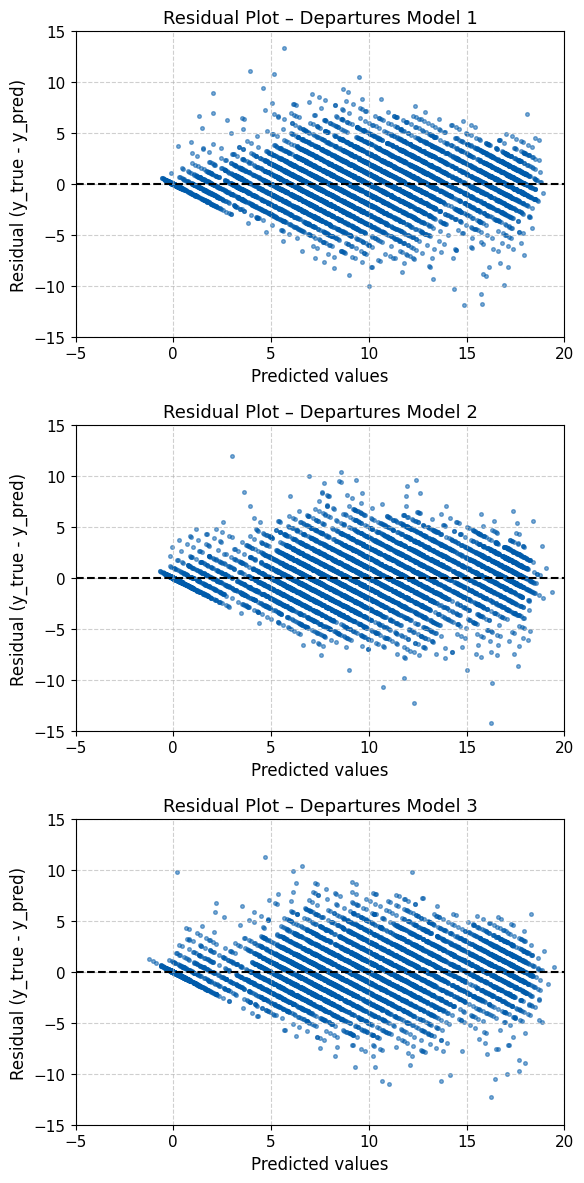

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\departures_CDF.pdf


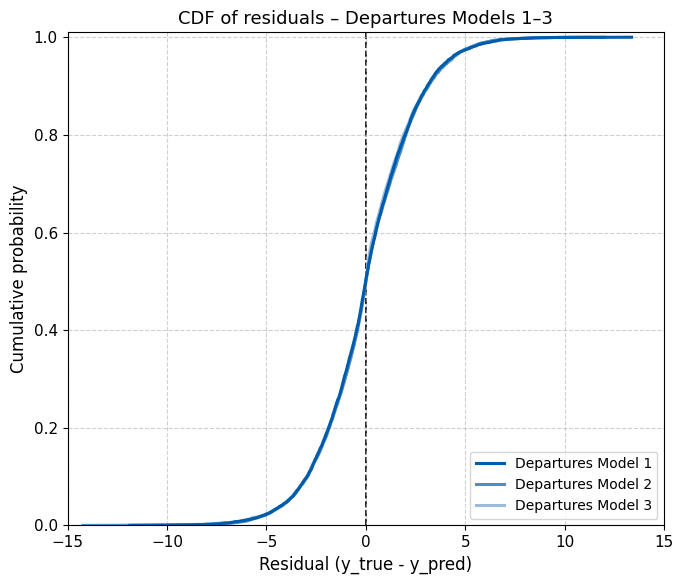

In [40]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_1 = "#005BAB"   # ZHAW blau
COLOR_2 = "#4C8FC7"   # etwas heller
COLOR_3 = "#9ABBDD"   # noch heller


def plot_departures_residuals_grid(models, X_tests, y_tests):
    """
    3x1-Grid mit Residualplots für die drei Departures-Modelle.
    Achsen fix gesetzt:
        x: -5 bis 20 (Ticks alle 5)
        y: -15 bis 15 (Ticks alle 5)
    Speichert: departures_residuals_grid_fixed_axes.pdf
    """

    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    fig, axes = plt.subplots(3, 1, figsize=(6, 12))

    residual_titles = [
        "Residual Plot – Departures Model 1",
        "Residual Plot – Departures Model 2",
        "Residual Plot – Departures Model 3"
    ]

    preds = []
    resids = []

    # Residuals berechnen
    for model, X, y in zip(models, X_tests, y_tests):
        y_pred = model.predict(X, num_iteration=model.best_iteration_)
        residuals = y.values.flatten() - y_pred
        preds.append(y_pred)
        resids.append(residuals)

    # Feste Achsen wie bei Arrivals
    X_MIN, X_MAX = -5, 20
    Y_MIN, Y_MAX = -15, 15

    for i, ax in enumerate(axes):

        ax.scatter(preds[i], resids[i], alpha=0.5, s=7, color=COLOR_1)
        ax.axhline(0, linestyle="--", color="black")

        ax.set_title(residual_titles[i])
        ax.set_xlabel("Predicted values")
        ax.set_ylabel("Residual (y_true - y_pred)")

        # Feste Achsen
        ax.set_xlim(X_MIN, X_MAX)
        ax.set_ylim(Y_MIN, Y_MAX)

        # Tickmarken alle 5
        ax.set_xticks(np.arange(X_MIN, X_MAX + 1, 5))
        ax.set_yticks(np.arange(Y_MIN, Y_MAX + 1, 5))

        ax.grid(True, linestyle="--", alpha=0.6)

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "departures_residuals_grid_fixed_axes.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()



def plot_departures_cdf(models, X_tests, y_tests):
    """
    Ein Plot mit den drei CDFs der Residuals (Departures Model 1–3).
    Schriftgrößen angepasst.
    Speichert: departures_CDF.pdf
    """

    # Schriftgrößen hochsetzen
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    fig, ax = plt.subplots(figsize=(7, 6))

    colors = [COLOR_1, COLOR_2, COLOR_3]
    labels = ["Departures Model 1", "Departures Model 2", "Departures Model 3"]

    lines = [None, None, None]
    residuals_per_model = []

    for model, X, y in zip(models, X_tests, y_tests):
        y_pred = model.predict(X, num_iteration=model.best_iteration_)
        residuals = y.values.flatten() - y_pred
        residuals_per_model.append(residuals)

    # gleicher Bereich wie bei Arrivals
    x_min, x_max = -15, 15

    for idx in [2, 1, 0]:
        residuals = residuals_per_model[idx]

        res_sorted = np.sort(residuals)
        n = len(res_sorted)
        cdf = np.arange(1, n + 1) / n

        line, = ax.plot(
            res_sorted, cdf,
            color=colors[idx],
            linewidth=2.2,
            zorder=10 if idx == 0 else 5
        )
        lines[idx] = line

    ax.axvline(0, linestyle="--", color="black", linewidth=1.2, zorder=1)

    ax.set_title("CDF of residuals – Departures Models 1–3")
    ax.set_xlabel("Residual (y_true - y_pred)")
    ax.set_ylabel("Cumulative probability")
    ax.grid(True, linestyle="--", alpha=0.6)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(0, 1.01)

    ax.legend(
        [lines[0], lines[1], lines[2]],
        [labels[0], labels[1], labels[2]],
        loc="lower right"
    )

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "departures_CDF.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()



# --- Aufrufe ---
plot_departures_residuals_grid(
    models=[model, model_dep2, model_dep3],
    X_tests=[X_test, X_dep2_test, X_dep3_test],
    y_tests=[y_test, y_dep2_test, y_dep3_test],
)

plot_departures_cdf(
    models=[model, model_dep2, model_dep3],
    X_tests=[X_test, X_dep2_test, X_dep3_test],
    y_tests=[y_test, y_dep2_test, y_dep3_test],
)


Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\departures_feature_importance_grid_3x1.pdf


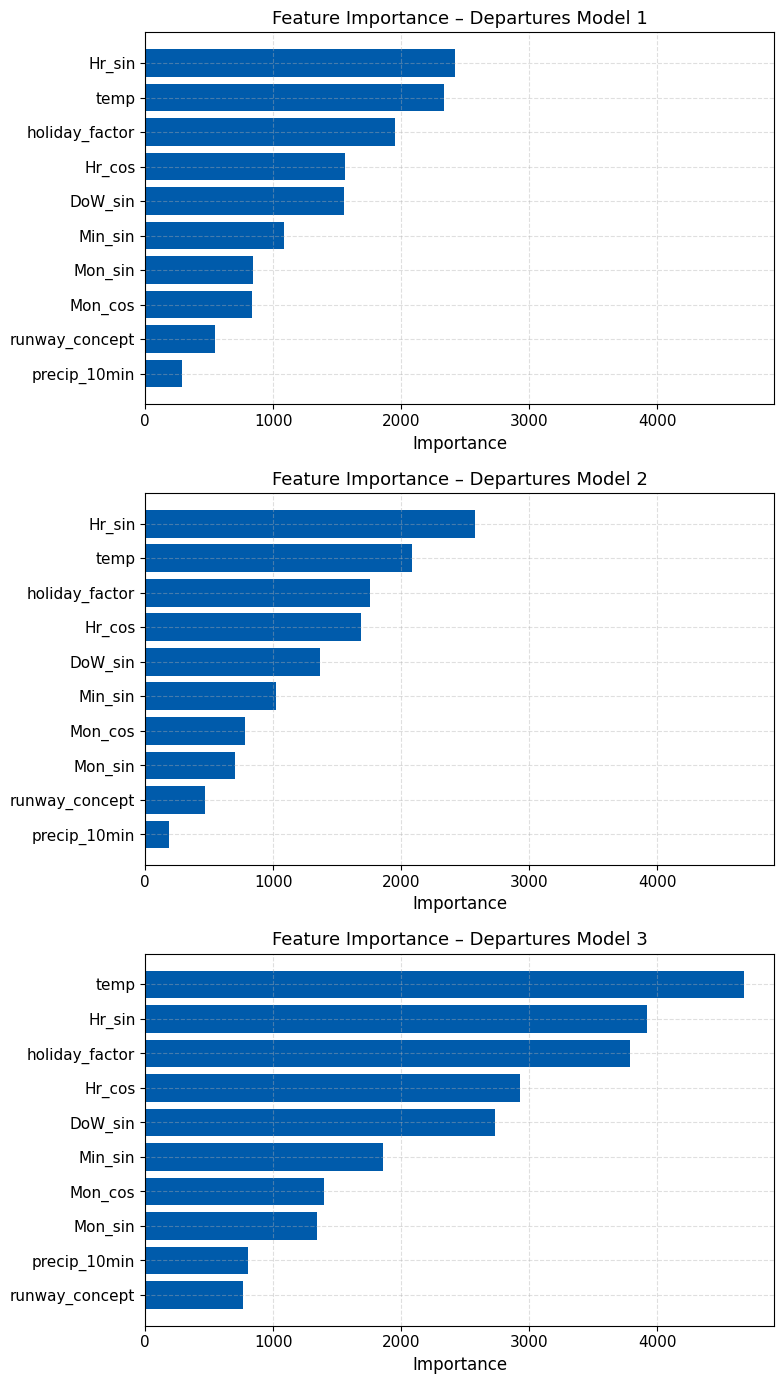

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

COLOR_ACTUAL = "#005BAB"   # ZHAW blue

# --- Mapping für kurze Variablennamen ---
SHORT_NAMES = {
    "gust_peak__three_seconds__maximum_in_m_per_s__m_per_s_": "gust_peak_3s",
    "precipitation_ten_minutes_total__mm_": "precip_10min",
    "dominant_runway_concept": "runway_concept",
    "Ferien_Gesamtfaktor": "holiday_factor",
    "vis_cat": "vis_cat",
    "wind_dir_sin": "wind_sin",
    "wind_dir_cos": "wind_cos",
    "Hour_sin": "Hr_sin",
    "Hour_cos": "Hr_cos",
    "Minute_sin": "Min_sin",
    "Month_sin": "Mon_sin",
    "Month_cos": "Mon_cos",
    "Day_of_week_sin": "DoW_sin",
    "temp": "temp"
}

def shorten(name):
    """Return shortened feature name if available."""
    return SHORT_NAMES.get(name, name)


def plot_feature_importances_3x1_dep(models, X_lists, labels):
    """
    Plots 3x1 feature‐importance charts
    für alle drei Departures‐Modelle.
    Schriftgrößen angepasst, Feature‐Namen gekürzt,
    Achsen global skaliert.
    """

    # ----- Schriftgrößen für Report -----
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    # ----- globale X-Achsen-Limits -----
    all_importances = []
    for model in models:
        all_importances.extend(model.feature_importances_)

    global_min = 0
    global_max = max(all_importances) * 1.05

    # ----- 3×1 Layout -----
    fig, axes = plt.subplots(3, 1, figsize=(8, 14))

    for ax, (model, X, label) in zip(axes, zip(models, X_lists, labels)):

        imp_df = pd.DataFrame({
            "feature": [shorten(f) for f in X.columns],
            "importance": model.feature_importances_
        }).sort_values("importance", ascending=False)

        ax.barh(imp_df["feature"], imp_df["importance"], color=COLOR_ACTUAL)
        ax.invert_yaxis()

        ax.set_xlim(global_min, global_max)

        ax.set_title(f"Feature Importance – {label}")
        ax.set_xlabel("Importance")

        ax.grid(True, linestyle="--", alpha=0.4)

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "departures_feature_importance_grid_3x1.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()



# ---- Aufruf ----
plot_feature_importances_3x1_dep(
    models=[model, model_dep2, model_dep3],
    X_lists=[X, X_dep2, X_dep3],
    labels=["Departures Model 1", "Departures Model 2", "Departures Model 3"]
)


## Fehlerverteilung Validierungsdaten

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\departures_val_error_distribution_grid.pdf


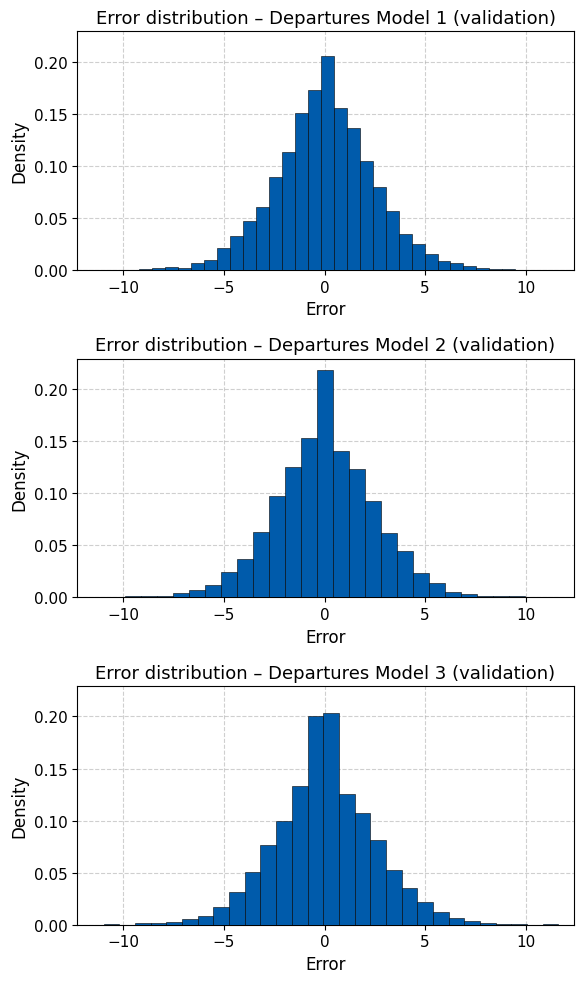

In [42]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_ACTUAL = "#005BAB"   # ZHAW blue

def plot_val_error_distributions_models_3x1_dep(y_vals, y_val_preds, labels):
    """
    Plots validation error histograms for all three DEPARTURES models (3x1 layout)
    with identical axis scaling and enlarged fonts for thesis-quality output.
    """

    # -------------------------------
    # 1) Globale Fehler & max. Dichte
    # -------------------------------
    all_errors = []
    max_densities = []

    for y_val, y_pred in zip(y_vals, y_val_preds):
        errors = y_val.values.flatten() - y_pred
        all_errors.append(errors)

        counts, bins = np.histogram(errors, bins=30, density=True)
        max_densities.append(counts.max())

    # Gemeinsame Achsenlimits
    global_min = min(e.min() for e in all_errors)
    global_max = max(e.max() for e in all_errors)
    global_ymax = max(max_densities)

    # -------------------------------
    # 2) Grössere Schrift einstellen
    # -------------------------------
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    # -------------------------------
    # 3) Plot (3×1 Layout)
    # -------------------------------
    fig, axes = plt.subplots(3, 1, figsize=(6, 10))  # Hochformat

    for i, (errors, label) in enumerate(zip(all_errors, labels)):
        ax = axes[i]

        ax.hist(
            errors, bins=30, density=True,
            alpha=1.0, color=COLOR_ACTUAL,
            edgecolor="black", linewidth=0.4,
            zorder=3
        )

        ax.set_xlim(global_min, global_max)
        ax.set_ylim(0, global_ymax * 1.05)

        ax.grid(True, linestyle="--", alpha=0.6, zorder=0)
        ax.set_title(f"Error distribution – {label} (validation)")
        ax.set_xlabel("Error")
        ax.set_ylabel("Density")

        ax.tick_params(axis="both", labelsize=11)

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "departures_val_error_distribution_grid.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")

    plt.show()


# Beispiel-Aufruf
plot_val_error_distributions_models_3x1_dep(
    y_vals=[y_val, y_dep2_val, y_dep3_val],
    y_val_preds=[y_val_pred, y_dep2_val_pred, y_dep3_val_pred],
    labels=[
        "Departures Model 1",
        "Departures Model 2",
        "Departures Model 3"
    ]
)


## Fehlerverteilung Testdaten

Gespeichert als: C:\Users\janni\OneDrive - ZHAW\5. Semester\Projektarbeit\Programm\Arbeit\Plots\departures_test_error_distribution_density_fixed_axes.pdf


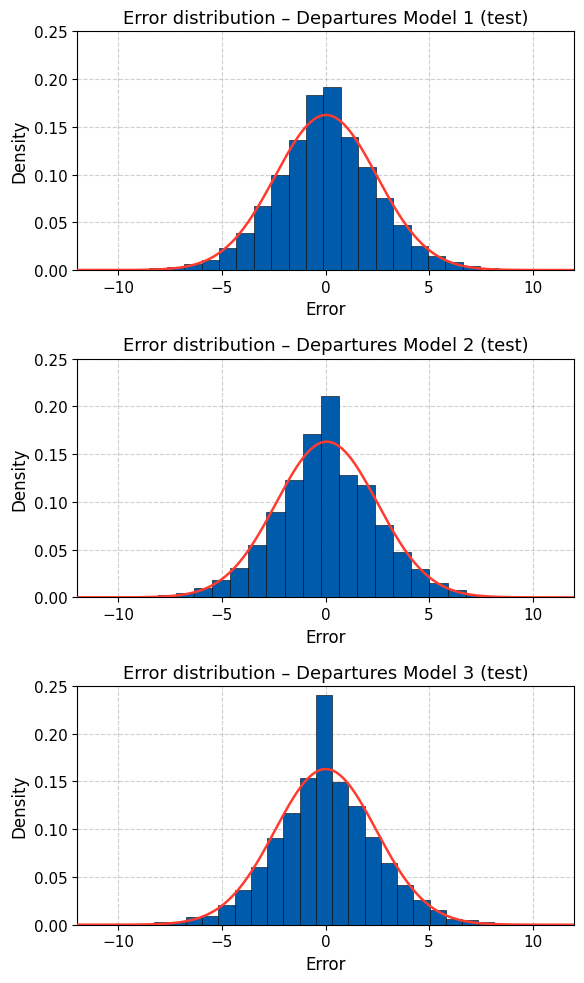


LaTeX table rows (copy into Overleaf):

\begin{tabular}{lcc}
Model & Mean ($\mu$) & Std ($\sigma$) \\ \hline
Departures Model 1 & 0.0261 & 2.4574 \\
Departures Model 2 & 0.0609 & 2.4467 \\
Departures Model 3 & 0.0096 & 2.4473 \\
\end{tabular}



In [43]:
import matplotlib.pyplot as plt
import numpy as np

COLOR_ACTUAL = "#005BAB"   # ZHAW blue (Histogram)
COLOR_PDF    = "#FF3B30"   # Rot für PDF-Kurve


# --- TEST-PREDICTIONS BERECHNEN (DEPARTURES 1–3) ---
y_dep1_test_pred = model.predict(X_test, num_iteration=model.best_iteration_)
y_dep2_test_pred = model_dep2.predict(X_dep2_test, num_iteration=model_dep2.best_iteration_)
y_dep3_test_pred = model_dep3.predict(X_dep3_test, num_iteration=model_dep3.best_iteration_)


def plot_test_error_distributions_models_3x1_dep(y_tests, y_test_preds, labels):
    """
    Plot der Error-Verteilungen (Departures 1–3, Test Dataset)
    mit symmetrischer x-Achse um 0 und 5er-Schritten:
        x-Achse: [-axis_limit, +axis_limit], axis_limit = nächster 5er-Schritt von max|Error|
        y-Achse: 0 bis 0.25
    + Ausgabe von µ und σ für Overleaf.
    """

    all_errors = []
    latex_rows = []

    # Errors sammeln
    for y_test, y_pred, label in zip(y_tests, y_test_preds, labels):
        errors = y_test.values.flatten() - y_pred
        all_errors.append((errors, label))

    # ---------- Achsenbereich aus Daten bestimmen ----------
    # Alle Errors zu einem Array zusammenfassen
    all_vals = np.concatenate([errs for (errs, _) in all_errors])
    max_abs = float(np.max(np.abs(all_vals)))          # größter absoluter Fehler
    max_abs = np.ceil(max_abs)                         # z.B. 11.2 -> 12.0
    axis_limit = int(np.ceil(max_abs / 5.0) * 5.0)     # z.B. 12 -> 15
    


    # PDF-x-Achse entsprechend wählen
    x_grid = np.linspace(-axis_limit, axis_limit, 400)

    # --- Plotgestaltung ---
    plt.rcParams.update({
    "font.size": 12,
    "axes.titlesize": 13,
    "axes.labelsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 10,
    })

    fig, axes = plt.subplots(3, 1, figsize=(6, 10))

    for ax, (errors, label) in zip(axes, all_errors):

        # Histogramm (als Dichte)
        ax.hist(
            errors,
            bins=30,
            density=True,
            alpha=1.0,
            color=COLOR_ACTUAL,
            edgecolor="black",
            linewidth=0.4,
            zorder=3,
        )

        # PDF
        mu = errors.mean()
        sigma = errors.std(ddof=0)

        if sigma > 0:
            pdf_vals = (1.0 / (sigma * np.sqrt(2 * np.pi))) * np.exp(
                -0.5 * ((x_grid - mu) / sigma) ** 2
            )
            ax.plot(
                x_grid,
                pdf_vals,
                color=COLOR_PDF,
                linewidth=1.8,
                zorder=4,
            )

        # ----- Achsen so setzen, wie du es willst -----
        # Feste Achsengrenzen
        ax.set_xlim(-12, 12)

        # Ticks NUR bei -10, -5, 0, 5, 10
        ax.set_xticks([-10, -5, 0, 5, 10])

        ax.set_ylim(0, 0.25)
        ax.set_yticks(np.arange(0, 0.26, 0.05))

        ax.grid(True, linestyle="--", alpha=0.6)
        ax.set_title(f"Error distribution – {label} (test)")
        ax.set_xlabel("Error")
        ax.set_ylabel("Density")

        # Tabelleintrag
        latex_rows.append(f"{label} & {mu:.4f} & {sigma:.4f} \\\\")

    plt.tight_layout()

    pdf_path = PLOTS_DIR / "departures_test_error_distribution_density_fixed_axes.pdf"
    plt.savefig(pdf_path, bbox_inches="tight")
    print(f"Gespeichert als: {pdf_path}")
    plt.show()

    # --- LaTeX-Tabelle ausgeben ---
    print("\nLaTeX table rows (copy into Overleaf):\n")
    print("\\begin{tabular}{lcc}")
    print("Model & Mean ($\\mu$) & Std ($\\sigma$) \\\\ \\hline")
    for row in latex_rows:
        print(row)
    print("\\end{tabular}\n")


# --- AUFRUF ---
plot_test_error_distributions_models_3x1_dep(
    y_tests=[y_test, y_dep2_test, y_dep3_test],
    y_test_preds=[y_dep1_test_pred, y_dep2_test_pred, y_dep3_test_pred],
    labels=[
        "Departures Model 1",
        "Departures Model 2",
        "Departures Model 3",
    ],
)
